# 1. Load the dataset in the file named BDOShoham.csv and produce at least one table and one graph that summarize the dataset statistics; 

First few rows of the dataset:


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.3,0.025,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.0,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.3,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.0,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.3,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051



Summary statistics of the dataset:


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,2.168595e-19,3.388430e-21,0.0,6.661925e-16,1.387901e-17,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


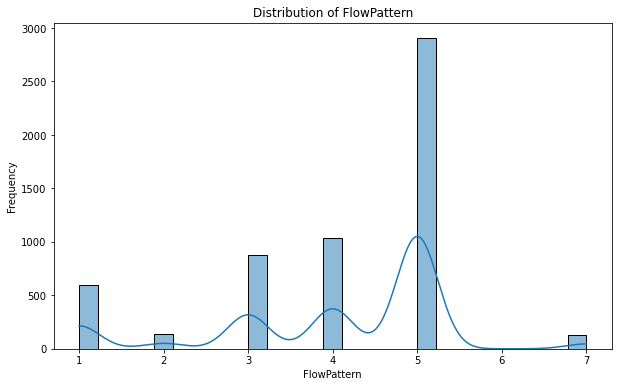

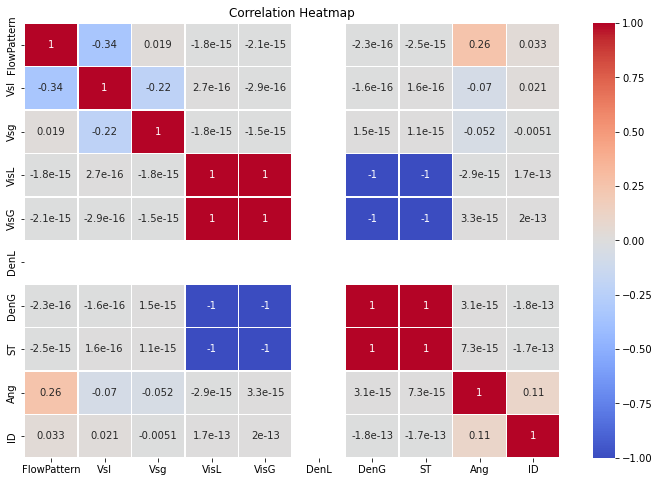

In [1]:
# BDOShoham Analysis Notebook

## Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'BDOShoham.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Produce a table summarizing the dataset statistics
print("\nSummary statistics of the dataset:")
summary_stats = data.describe()
display(summary_stats)

# Produce a graph summarizing the dataset statistics
# Example: Distribution of a specific column (assuming there is a numerical column named 'FlowPattern')
plt.figure(figsize=(10, 6))
sns.histplot(data['FlowPattern'], kde=True)
plt.title('Distribution of FlowPattern')
plt.xlabel('FlowPattern')
plt.ylabel('Frequency')
plt.show()

# Another example: Correlation heatmap of the dataset
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Set up a classification problem: predicting the FlowPattern value based on the values of the variables named Vsl, Vsg, and Ang, and split the dataset into separate training and test sets in a reproducible way; 

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Select the relevant features and target variable
features = data[['Vsl', 'Vsg', 'Ang']]
target = data['FlowPattern']

# Split the dataset into training and test sets in a reproducible way
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (4540, 3) (4540,)
Test set shape: (1135, 3) (1135,)


# 3. Train at least two models (e.g., k-NN, logistic regression) to solve this classification problem. Use the training set you created in part 2 to cross-validate the performance of each model. Report on three different scoring methods (e.g., accuracy, weighted precision, macro recall, f1 score); 

In [4]:
#k-Nearest Neighbors (k-NN)
# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation and report the scores
scoring = ['accuracy', 'precision_weighted', 'recall_macro', 'f1_macro']
knn_cv_results = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)

print("k-NN Cross-Validation Results:")
for score in scoring:
    print(f"{score}: {knn_cv_results['test_' + score].mean():.3f} ± {knn_cv_results['test_' + score].std():.3f}")

k-NN Cross-Validation Results:
accuracy: 0.839 ± 0.005
precision_weighted: 0.846 ± 0.003
recall_macro: 0.813 ± 0.022
f1_macro: 0.795 ± 0.018


In [5]:
#Logistic Regression
# Initialize the logistic regression classifier
logreg = LogisticRegression(max_iter=1000)

# Perform cross-validation and report the scores
scoring = {'accuracy': 'accuracy', 'recall_macro': 'recall_macro', 'f1_macro': 'f1_macro'}
logreg_cv_results = cross_validate(logreg, X_train, y_train, cv=5, scoring=scoring)


print("Logistic Regression Cross-Validation Results:")
for score in scoring:
    print(f"{score}: {logreg_cv_results['test_' + score].mean():.3f} ± {logreg_cv_results['test_' + score].std():.3f}")

Logistic Regression Cross-Validation Results:
accuracy: 0.665 ± 0.011
recall_macro: 0.466 ± 0.015
f1_macro: 0.484 ± 0.014


# 4. Pick a model and a scoring method from part 3. Use cross-validation to evaluate the improvement/degradation of performance when you modify at least two hyperparameters (e.g., n_neighbors, weights, metric, penalty) as compared to the model’s default settings; 

In [6]:
# Initialize the k-NN classifier with default settings
knn_default = KNeighborsClassifier()

# Perform cross-validation with default settings
default_cv_results = cross_validate(knn_default, X_train, y_train, cv=5, scoring='accuracy')
print("Default k-NN Accuracy: {:.3f} ± {:.3f}".format(default_cv_results['test_score'].mean(), default_cv_results['test_score'].std()))

# Initialize the k-NN classifier with modified hyperparameters
knn_modified = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Perform cross-validation with modified settings
modified_cv_results = cross_validate(knn_modified, X_train, y_train, cv=5, scoring='accuracy')
print("Modified k-NN Accuracy (n_neighbors=10, weights='distance'): {:.3f} ± {:.3f}".format(modified_cv_results['test_score'].mean(), modified_cv_results['test_score'].std()))

Default k-NN Accuracy: 0.839 ± 0.005
Modified k-NN Accuracy (n_neighbors=10, weights='distance'): 0.841 ± 0.009


# 5. Test the performance of the best model+hyperparameters combination you found in part 4, using the test set you created in part 2. Discuss your overall results.

Test Set Performance of Best k-NN Model:
Accuracy: 0.865
Weighted Precision: 0.872
Macro Recall: 0.849
F1 Score: 0.822

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.83      0.79       102
           2       0.75      0.89      0.81        27
           3       0.84      0.85      0.85       192
           4       0.78      0.89      0.83       200
           5       0.94      0.87      0.91       593
           7       0.73      0.76      0.74        21

    accuracy                           0.87      1135
   macro avg       0.80      0.85      0.82      1135
weighted avg       0.87      0.87      0.87      1135


Confusion Matrix:
[[ 85   0   0   0  17   0]
 [  0  24   2   0   1   0]
 [  3   7 164  14   4   0]
 [  0   0  16 178   6   0]
 [ 22   1  14  35 515   6]
 [  3   0   0   0   2  16]]


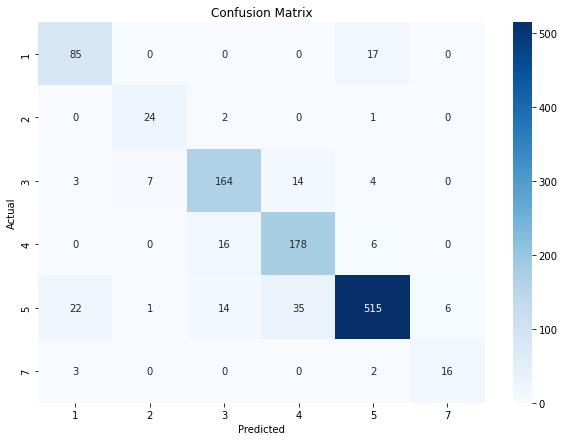

In [7]:
# Train the best model on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
best_knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Test Set Performance of Best k-NN Model:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Weighted Precision: {precision:.3f}")
print(f"Macro Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Discussion

The k-NN model with n_neighbors=10 and weights='distance' demonstrates strong predictive power, with high accuracy and balanced precision and recall across most classes. The model performs particularly well for the majority class (Class 5), which contributes to the overall high performance metrics. However, there is room for improvement in handling classes with fewer instances (like Class 7), where precision and recall are lower compared to the majority class.

